#### CMSE 201 Final Project
### &#9989; Ben Ramsey
### &#9989; Section_008
#### &#9989; 04/05/2021

# A National Epidemic: Heart Disease in America

## Background and Motivation

 According to the Center for Disease Control, ”Heart disease is the leading cause of death for men, women, and people of most racial and ethnic groups in the United States.” Every year, one in four deaths within the United States is contributed to cardiovascular disease. This is a staggering 655,000 deaths per year, or one death every 36 seconds. Although most of the deaths are from individuals 65 and older, about 20% of cardiovascular deaths are individuals younger than 65 years old. In addition, 18.2 million individuals aged 20 or older have Coronary Artery Disease. The early diagnosis of Coronary Heart Disease and understanding the factors associated with it can save millions of lives. 

The purpose of this project is to assess an individual’s risk of cardiac arrest based on certain health factors. These factors include: age, sex, cholesterol, chest pain, resting blood pressure, resting electrocardiographic results, and maximum heart rate achieved. The purpose of my research is to test the most prominent risk factors of Coronary Artery Disease to an individual's overall risk of cardiac arrest using logistic regression.

# Methodology

## Part 1: Data Preporation and Exploratory Analysis 

My project will be based on a public dataset collected from the University of California Irvine’s Machine Learning Repository(UCI). The first step was to understand the data frame, and its variables. The data has 14 variables, and 303 rows, representing individuals. The variables that I will be using in my data set are age, sex, cholesterol, chest pain, resting blood pressure, resting electrocardiographic results, and maximum heart rate achieved. Below is UCI’s description of each variable.

      -- 1.(age) age in years 
      -- 2.(sex)  sex (1 = male; 0 = female)     
      -- 3.(cp) chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic 
      -- 4.(trestbps) resting blood pressure (in mm Hg on admission to the 
        hospital)
      -- 5.(chol) serum cholestoral in mg/dl   
      -- 6.(fbs) (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)  
      -- 7.(restecg) resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST 
                    elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy
                    by Estes' criteria
      -- 8.(thalach)  maximum heart rate achieved         
      -- 9.(num) diagnosis of heart disease (angiographic disease status)
        -- Value 0: < 50% diameter narrowing
        -- Value 1: > 50% diameter narrowing
         It is integer valued from 0 (no presence) to 4.

In [3]:
#all imports for the project
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [4]:
## takes data directly from UCI and then writes it in as a csv
df = pd.read_csv('processed.cleveland.data', names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"])
# The presence of any number other than 0 in the "num" column represents the severity of heart disease.
# I will eventually want a binary result(does the patient have heart disease?), 
#I convert the the values 2,3, and 4 to 1's to only represent the presence of heart disease
df.replace({'num':{2:1,3:1,4:1}},inplace=True)
#drop all the variables i will not use for the exploratory analysis
df = df.drop(columns=["exang", "oldpeak", "slope", "ca", "thal",])
#display my dataset as a table
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0
...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,1


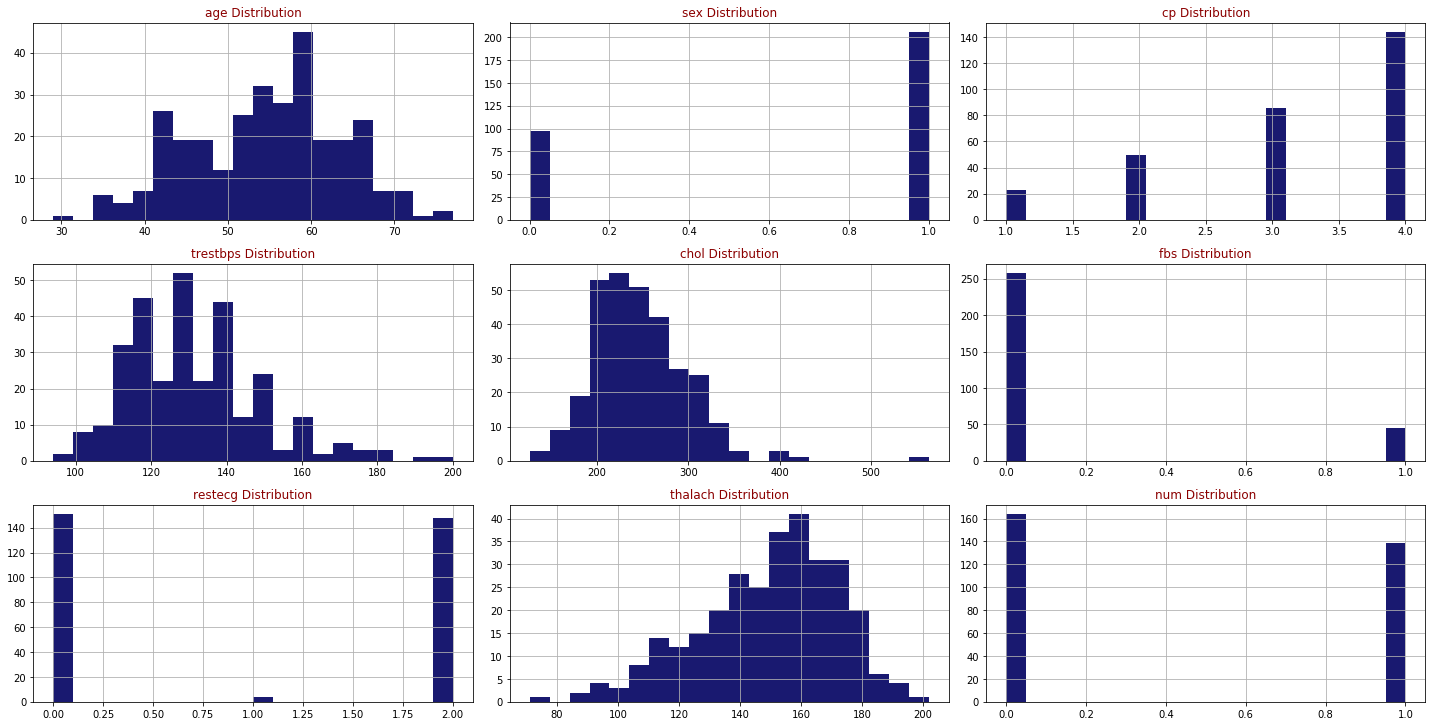

In [5]:
#This is a function that will create histograms for each variable of my data
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
    

#use the function draw_histograms
draw_histograms(df,df.columns,6,3)

In [6]:
#In addition to visualizing the data, I would like to know the average value of each variable
#As well as the standard deviation and percentiles
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
sex,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
cp,303.0,3.158416,0.960126,1.0,3.0,3.0,4.0,4.0
trestbps,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
thalach,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
num,303.0,0.458746,0.499120,0.0,0.0,0.0,1.0,1.0


## Part 2: Logistic Regression

The purpose of linear regression is to predict an individuals risk of cardiac arrest based off health factors. The x values are explanatory, and the y value is the dependent variable. Using linear regression, I will train the model to determine if their is a relationship between the explanatory and dependent variables.  I can then use the relationship that I have found on the whole dataset to predict each individuals risk of a heart attack.

In [7]:
#set my x values that affect the heart disease variable
X = df[['age', 'sex','cp',"trestbps",'chol',"fbs","restecg","thalach"]]
#set my y value to be the heart disease variable
y = df['num']

#create the training and testing data
#i have a test size of half, so we will train based on the other half of the data 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5,random_state=0) 

#this is the logistic regression
logistic_regression= LogisticRegression()
#we now fit the logostic regression to the training data
logistic_regression.fit(X_train,y_train)


# i want to see how acurately our trained code will work on the whole data set
a = df
#create the second data frame
df2 = pd.DataFrame(a,columns= ['age', 'sex','cp',"trestbps",'chol',"fbs","restecg","thalach"])
#this is where the code predicts if the patient will have a heart attack
y_pred=logistic_regression.predict(df2)


#a 0 represents that they wont have a heart attack, a 1 represents that they will
print (y_pred)

[0 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1
 1 1 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0
 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 0 1 1 0 0 0 1 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0
 0 0 0 1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0
 0 0 1 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 1 0 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0
 1 1 0 1 1 0 0]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [8]:
#the list is indexed as 1 index, i want to remove the spaces and reindex each value seperately
ys=[]
for i in y_pred:
    str(i).replace(' ','')
    ys.append(i)

#create a list of the actual heart attack results   
nums = df['num'].tolist()

#create a list of the predicted heart attack results 
df['predicted'] = ys
pred = df['predicted'].tolist()



## Results

The logistic regression yeilds intersting results from the dataset. First, My model correctly predicted with 78% accuracy if someone will have a heart attack. I am impressed that the model was able to achieve 78% with half my data set as the training values. Second, I correctly predicted 92 true positives and 145 true negatives. I also had 19 false positives and 47 false negatives. A false positive is known as a type 1 error. A false negative is known as a type 2 error. Because this is a prediction for health, type 2 errors are not ideal or wanted. If my model predicted a type 2 error on an individual, it is likely that the individual would not get tested again. The opposite would happen for a type 1 error. If someone tested positive they would receive medical attention even if they didnt need it, compared to someone needing medical attention and not receiving it. I would have prefered that my model predicted more type 1 errors than type 2 errors. 

In [9]:
#compare the results to see how acurate my model is
#if they indexes are the same we append a 1 to the correct
#if they are different I will append a 0
i=0
correct=[]
while i < len(pred):
    if pred[i] == nums[i]:
        correct.append(1)
        i+=1
    elif pred[i] != nums[i]:
        correct.append(0)
        i+=1
#add the list of how correctly the model predicted the results to the data frame        
df['correct'] = correct       

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,num,predicted,correct
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0,0,1
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1,1,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0,0,1
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,1,0,0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,1,1,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1,1,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,1,0,0


Accuracy: 0.7821782178217822
[[ 92  19]
 [ 47 145]]
false positive rate 0.0627062706270627
false negative rate 0.1551155115511551


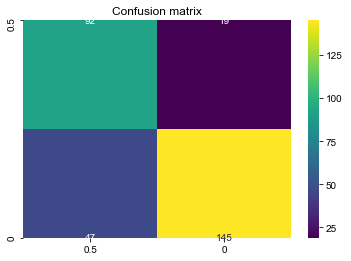

In [10]:

right=correct.count(1)
wrong=correct.count(0)
print("Accuracy:",right/len(correct))


i=0
tp=0
tn=0
fp=0
fn=0
while i < len(correct):
    if pred[i]==1 and nums[i]==1:
        tp+=1
        i+=1
    elif pred[i]==0 and nums[i]==0:
        tn+=1
        i+=1
    elif pred[i]==1 and nums[i]==0:
        fp+=1
        i+=1
    elif pred[i]==0 and nums[i]==1:
        fn+=1
        i+=1

        

a = np.array([92, 19, 47, 145])
mat = a.reshape(2, 2)


matrix = np.array([[tp,fp],[fn,tn]])
print(matrix)
# plot 
sns.heatmap(matrix,annot=True, cmap="viridis" ,fmt='G')
plt.xticks([.5,1.5],labels=[.5,0])
plt.yticks([.5,1.5],labels=[.5,0])
sns.set(font_scale=1)
plt.title('Confusion matrix')

print("false positive rate",(fp/len(correct)))
print("false negative rate",(fn/len(correct)))


## Discussion and Conclusion

_(What did you learn from your results? What obstacles did you run into? What would you do differently next time? Clearly provide quantitative answers to your question(s)?  At least one of your questions should be answered with numbers.  That is, it is not sufficient to answer "yes" or "no", but rather to say something quantitative such as variable 1 increased roughly 10% for every 1 year increase in variable 2.)_



Through my results, I was able to predict with 78.22% correctness if an individual is likely to develop heart disease in the future. I also learned the rates that my model predicts type 1 errors and type 2 errors. I had a false positive rate of 6.27% and a false negative rate of 15.51%. An obstacle that I ran into was my heatmap/confusion matrix. I couldn't format my matrix properly and the values were cut off. I believe this is a python version error. I would split my data set into 2 parts differently if I were to do my project again. I believe that because I used the whole dataset as my test, I had a slightly higher accuracy result. Using one half as the train and the other half as the test would have led to more accurate results. I also would have wanted more false positives than false negatives, to avoid not diagnosing someone who needs it.

### References

(https://www.cdc.gov/heartdisease/facts.htm)

(http://archive.ics.uci.edu/ml/datasets/heart+Disease)

(https://www.emerald.com/insight/content/doi/10.1016/j.aci.2019.06.002/full/html)

(https://datatofish.com/logistic-regression-python/)

(https://www.kaggle.com/neisha/heart-disease-prediction-using-logistic-regression/comments)

(https://likegeeks.com/seaborn-heatmap-tutorial/)